In [1]:
from sklearn.preprocessing import LabelBinarizer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import datasets

from sklearn.metrics import classification_report

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
train = pd.read_csv("mnist_train.csv", header=None)
test = pd.read_csv("mnist_test.csv", header=None)

In [50]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
x_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

x_test = test.iloc[:,1:]
y_test = test.iloc[:,0]

In [52]:
x_train.shape

(60000, 784)

In [53]:
x_test.shape

(10000, 784)

In [54]:
x_train = x_train.to_numpy()

In [55]:
x_train = x_train.reshape(60000,28,28)

In [56]:
x_train.shape

(60000, 28, 28)

In [57]:
x_test = x_test.to_numpy()
x_test = x_test.reshape(10000,28,28)

In [58]:
x_test.shape

(10000, 28, 28)

In [2]:
# ((X_train , Y_train),(X_test, Y_test)) = datasets.mnist.load_data()

In [7]:
# X_train.shape

(60000, 28, 28)

In [8]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [9]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.fit_transform(Y_test)

In [10]:
Y_test

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [14]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3,3), input_shape=(28,28,1), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, kernel_size=(3,3), input_shape=(28,28,1), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(20, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [15]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 32)          18464     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 1, 1, 32)        

In [16]:
model.compile(optimizer="sgd", loss="categorical_crossentropy",metrics=["accuracy"])
h = model.fit(X_train,Y_train, validation_data=(X_test, Y_test), batch_size=500, epochs=4)

Epoch 1/4
120/120 [==============================] - 57s 471ms/step - loss: 2.4794 - accuracy: 0.0974 - val_loss: 2.3718 - val_accuracy: 0.0982
Epoch 2/4
120/120 [==============================] - 59s 496ms/step - loss: 2.3387 - accuracy: 0.0974 - val_loss: 2.3182 - val_accuracy: 0.0982
Epoch 3/4
120/120 [==============================] - 64s 537ms/step - loss: 2.3104 - accuracy: 0.0974 - val_loss: 2.3053 - val_accuracy: 0.0982
Epoch 4/4
120/120 [==============================] - 63s 524ms/step - loss: 2.3034 - accuracy: 0.1042 - val_loss: 2.3021 - val_accuracy: 0.1135


In [17]:
prediction = model.predict(X_test, batch_size=500)

20/20 [==============================] - 3s 131ms/step


In [18]:
print(classification_report(prediction.argmax(axis=1), Y_test.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.11      0.20     10000
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.11     10000
   macro avg       0.10      0.01      0.02     10000
weighted avg       1.00      0.11      0.20     10000



D:\Random Docs\BE_Submissions\DL\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Random Docs\BE_Submissions\DL\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Random Docs\BE_Submissions\DL\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


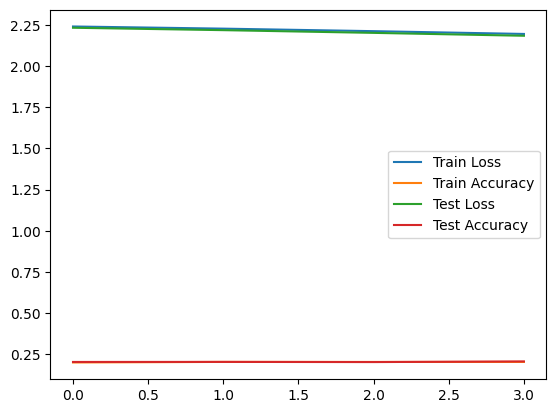

In [19]:
plt.figure()
epochs = 4
plt.plot(np.arange(0, epochs), h.history["loss"], label="Train Loss")
plt.plot(np.arange(0, epochs), h.history["accuracy"], label="Train Accuracy")
plt.plot(np.arange(0, epochs), h.history["val_loss"], label="Test Loss")
plt.plot(np.arange(0, epochs), h.history["val_accuracy"], label="Test Accuracy")
plt.legend()